In [1]:
from google.colab import files
uploaded = files.upload()

Saving sun_and_cloud.csv to sun_and_cloud.csv


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('sun_and_cloud.csv',encoding = 'cp949')

print(data.info())
print('--------------------------------------------','\n')
print(data.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   26304 non-null  int64  
 1   시간           26304 non-null  int64  
 2   일조(hr)       26304 non-null  float64
 3   일사(MJ/m2)    26304 non-null  float64
 4   전운량(10분위)    26304 non-null  float64
 5   중하층운량(10분위)  26304 non-null  float64
 6   지면온도(°C)     26304 non-null  float64
 7   전력거래량        26304 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.6 MB
None
-------------------------------------------- 

Unnamed: 0     26303.000000
시간                23.000000
일조(hr)             1.000000
일사(MJ/m2)          3.780000
전운량(10분위)         10.000000
중하층운량(10분위)       10.000000
지면온도(°C)          62.400000
전력거래량             10.807822
dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
result = scaler.fit_transform(data)
df_scld= pd.DataFrame(data=result,columns=data.columns)
df_scld

,Unnamed: 0,시간,일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),지면온도(°C),전력거래량
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.150000,0.000000
1,0.000038,0.043478,0.0,0.0,0.0,0.0,0.143421,0.000000
2,0.000076,0.086957,0.0,0.0,0.0,0.0,0.139474,0.000000
3,0.000114,0.130435,0.0,0.0,0.0,0.0,0.132895,0.000000
4,0.000152,0.173913,0.0,0.0,0.0,0.0,0.128947,0.000000
...,...,...,...,...,...,...,...,...
26299,0.999848,0.826087,0.0,0.0,0.0,0.0,0.122368,0.005463
26300,0.999886,0.869565,0.0,0.0,0.0,0.0,0.110526,0.005455
26301,0.999924,0.913043,0.0,0.0,0.0,0.0,0.103947,0.000866
26302,0.999962,0.956522,0.0,0.0,0.0,0.0,0.098684,0.000000


In [ ]:
x_train = df_scld.iloc[:25560,:-1] # 18년 ~ 20년 11월 --> Train & Validation
y_train = df_scld.iloc[:25560,-1] # 18년 ~ 20년 11월 --> Train & Validation

x_pred = df_scld.iloc[25560:,:-1] # 20년 12월- 예측용 변수 --> Preidction
y_pred = df_scld.iloc[25560:,-1] # 20년 12월 - 예측용 정답 --> Preidction


# --- Ensemble 을 위해서 np.array 형태로 data type 전환해보기
x_train = np.array(x_train)
y_train = np.array(y_train)

x_pred = np.array(x_pred)
y_pred = np.array(y_pred)

print(x_train,'\n',x_pred,'\n',y_train,'\n',y_pred)
print('------------------------------------------------------------------------------------------------------------------------')
print(x_train.shape,'\n',x_pred.shape,'\n',y_train.shape,'\n',y_pred.shape)

[[0.         0.         0.         ... 0.         0.15       0.26823388]
 [0.04347826 0.         0.         ... 0.         0.14342105 0.39722725]
 [0.08695652 0.         0.         ... 0.         0.13947368 0.39722725]
 ...
 [0.91304348 0.         0.         ... 0.         0.16973684 0.39722725]
 [0.95652174 0.         0.         ... 0.         0.16052632 0.39722725]
 [1.         0.         0.         ... 0.         0.15657895 0.39722725]] 
 [[0.         0.         0.         ... 0.         0.15526316 0.39722725]
 [0.04347826 0.         0.         ... 0.         0.15394737 0.39722725]
 [0.08695652 0.         0.         ... 0.         0.15131579 0.39722725]
 ...
 [0.91304348 0.         0.         ... 0.         0.10394737 0.39722725]
 [0.95652174 0.         0.         ... 0.         0.09868421 0.39722725]
 [1.         0.         0.         ... 0.         0.09342105 0.39722725]] 
 [0.         0.         0.         ... 0.00438201 0.         0.        ] 
 [0.00000000e+00 0.00000000e+00 0.0

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
#x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],1)
x_pred = x_pred.reshape(x_pred.shape[0],x_pred.shape[1],1)

#print(x_train.shape,'\n',x_val.shape,'\n',x_pred.shape)
print(x_train.shape,'\n',x_pred.shape)

feature_num = len(x_train[0])
feature_num

(25560, 7, 1) 
 (744, 7, 1)


7

In [ ]:
Epochs = 100 #---------------------------------------------------------------[ 100 / 150 / 200 / 250 ] 총 4차례 진행

from tensorflow.keras import models, layers

RNN= models.Sequential()
RNN.add(layers.SimpleRNN(units=32, return_sequences=True,  activation='tanh', input_shape=(feature_num,1)))
RNN.add(layers.Dropout(rate=0.2))
RNN.add(layers.SimpleRNN(units=64, return_sequences=True, activation='tanh'))
RNN.add(layers.Dropout(rate=0.2))
RNN.add(layers.SimpleRNN(64, activation='tanh')) 
RNN.add(layers.Dropout(rate=0.2))
RNN.add(layers.Dense(1)) 

RNN.summary()

RNN.compile(loss='mse', optimizer='adam', metrics=['mae']) 

history = RNN.fit(x_train, y_train, validation_split=0.2, epochs=250) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 7, 32)             1088      
                                                                 
 dropout_9 (Dropout)         (None, 7, 32)             0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 7, 64)             6208      
                                                                 
 dropout_10 (Dropout)        (None, 7, 64)             0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
predict = RNN.predict(x_pred)

In [ ]:
max_val = data['전력거래량'].max()
Pred_Rescale = max_val*predict
print(Pred_Rescale)

[[ 1.12345919e-01]
 [ 1.05159424e-01]
 [ 9.97043699e-02]
 [ 7.28558749e-02]
 [ 7.40540773e-02]
 [ 1.05121419e-01]
 [ 1.26350269e-01]
 [ 1.85113057e-01]
 [ 1.53121650e+00]
 [ 3.57357478e+00]
 [ 5.68844748e+00]
 [ 7.33626080e+00]
 [ 7.98372078e+00]
 [ 7.81081057e+00]
 [ 6.64111853e+00]
 [ 3.35209823e+00]
 [ 6.77679181e-01]
 [ 1.24161124e-01]
 [ 1.34074017e-01]
 [ 8.42259452e-02]
 [ 7.76293725e-02]
 [ 7.74963424e-02]
 [ 8.12454075e-02]
 [ 7.94131532e-02]
 [-3.21922675e-02]
 [ 7.54688978e-02]
 [ 5.82334213e-02]
 [ 3.95336896e-02]
 [ 2.24940497e-02]
 [ 1.50181511e-02]
 [ 3.76115665e-02]
 [ 1.41468912e-01]
 [ 3.02210718e-01]
 [ 7.78949559e-01]
 [ 1.07003820e+00]
 [ 1.86484647e+00]
 [ 4.61370134e+00]
 [ 5.08593941e+00]
 [ 5.33845186e+00]
 [ 3.15555453e+00]
 [ 1.35492706e+00]
 [ 2.16954071e-02]
 [ 1.40493765e-01]
 [ 1.30310297e-01]
 [ 1.95251092e-01]
 [ 1.91311195e-01]
 [ 9.98655781e-02]
 [ 1.09673314e-01]
 [-5.60827740e-02]
 [ 9.50151011e-02]
 [ 7.10796639e-02]
 [-3.90461944e-02]
 [-2.6215411

In [ ]:
for i in range (0,len(Pred_Rescale)):
  if Pred_Rescale[i] < 0 :
    Pred_Rescale[i] = 0

print(Pred_Rescale)

[[1.12345919e-01]
 [1.05159424e-01]
 [9.97043699e-02]
 [7.28558749e-02]
 [7.40540773e-02]
 [1.05121419e-01]
 [1.26350269e-01]
 [1.85113057e-01]
 [1.53121650e+00]
 [3.57357478e+00]
 [5.68844748e+00]
 [7.33626080e+00]
 [7.98372078e+00]
 [7.81081057e+00]
 [6.64111853e+00]
 [3.35209823e+00]
 [6.77679181e-01]
 [1.24161124e-01]
 [1.34074017e-01]
 [8.42259452e-02]
 [7.76293725e-02]
 [7.74963424e-02]
 [8.12454075e-02]
 [7.94131532e-02]
 [0.00000000e+00]
 [7.54688978e-02]
 [5.82334213e-02]
 [3.95336896e-02]
 [2.24940497e-02]
 [1.50181511e-02]
 [3.76115665e-02]
 [1.41468912e-01]
 [3.02210718e-01]
 [7.78949559e-01]
 [1.07003820e+00]
 [1.86484647e+00]
 [4.61370134e+00]
 [5.08593941e+00]
 [5.33845186e+00]
 [3.15555453e+00]
 [1.35492706e+00]
 [2.16954071e-02]
 [1.40493765e-01]
 [1.30310297e-01]
 [1.95251092e-01]
 [1.91311195e-01]
 [9.98655781e-02]
 [1.09673314e-01]
 [0.00000000e+00]
 [9.50151011e-02]
 [7.10796639e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.83592020e-02]
 [1.27431393e-01]
 [1.941206

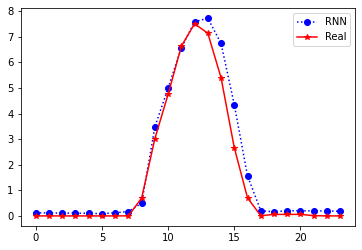

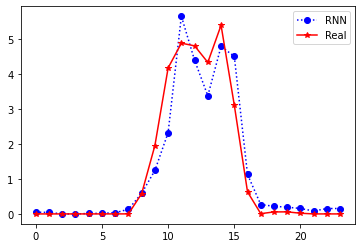

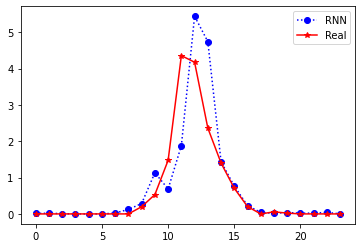

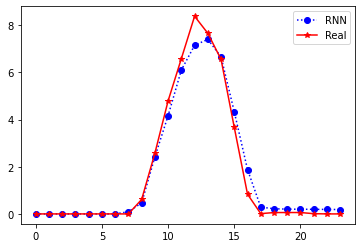

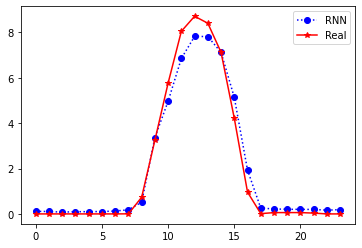

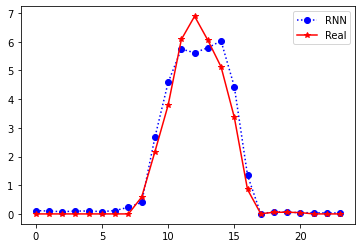

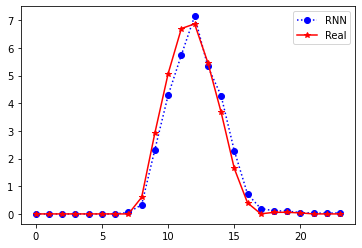

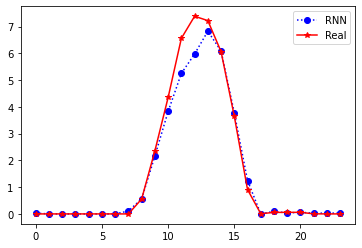

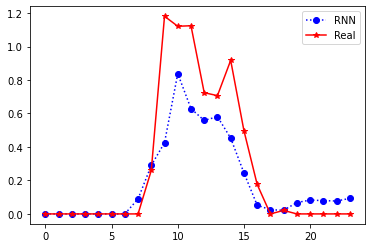

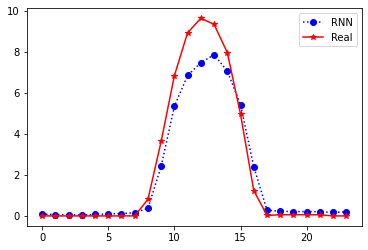

In [ ]:
import matplotlib.pyplot as plt

# 17520 부터 2020년 data

for t in range (0,10): # 10개씩 plot figure 보고싶음
  date= t + 20  #-------- 보고싶은 구간 반영하여 0~21 까지 수동으로 더해주기
  Ans_date = 25584+date*24 # --- Answer 범위가 range-24부터 시작하니까 (21888부터 20년 7월) (25560부터 20년 12월)
  
  x=np.array(range(24))
  Y = Pred_Rescale[24*date:24*date+24]
  Answer = pd.Series(data[Ans_date-24:Ans_date]['전력거래량']).array
  #Answer = pd.Series(data[Ans_date-24:Ans_date]['전력거래량']).array
  
  plt.figure()
  plt.plot(x,Y,'bo:')
  plt.plot(x,Answer,'r*-')
  plt.legend(['RNN','Real'])

In [ ]:
from sklearn.metrics import mean_absolute_error

RNN_mae = mean_absolute_error(RNN.predict(x_pred), y_pred)
print('RNN mae :', max_val*RNN_mae)

RNN mae : 0.3075799620595063


In [ ]:
RNN_eval = RNN.evaluate(x_pred,y_pred)
RNN_MAE = RNN_eval[1]*max_val
print('RNN MAE =',RNN_MAE)

24/24 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0285
RNN MAE = 0.3075799414864778


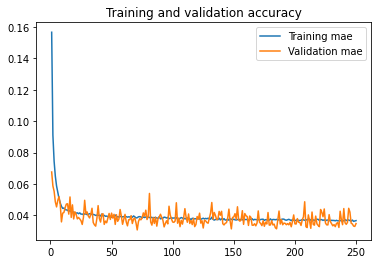

In [ ]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae=history.history['val_mae']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1,len(mae) + 1) 

plt.plot(epochs, mae, label = 'Training mae')
plt.plot(epochs, val_mae, label = 'Validation mae')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

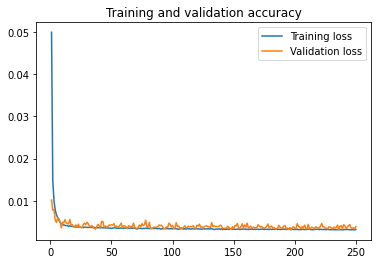

In [ ]:
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()